In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph

import seaborn as sns

# Pandas series object

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)
print(data.values)
print(data.index)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


In [6]:
# index can be custom
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)
print(data['c'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.75


In [7]:
# use dictionaries to make data
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [9]:
# From 2 dimensional numpy arrays

pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.767550,0.952128
b,0.496205,0.692608
c,0.874840,0.996783


## Data Indexing and Selection

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(data)
print(data.keys())

print(list(data.items()))

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


In [16]:
print(data[(data > 0.3) & (data < 0.8)]) # masking
print(data[['a', 'e']]) # fancy indexing

b    0.50
c    0.75
dtype: float64
a    0.25
e     NaN
dtype: float64


/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [19]:
# loc and iloc

data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(data)
print(data.loc[1:3]) # loc uses explicit index
print(data.iloc[1:3]) #iloc used implicit index

1    a
3    b
5    c
dtype: object
1    a
3    b
dtype: object
3    b
5    c
dtype: object


In [21]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [23]:
display(data.iloc[:3, :2]) # select up to 3rd row and 2nd columns
display(data.ix[:3, :'pop']) # hybrid

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [28]:
display(data.T)
display(data.loc[data['area'] > 500000, ['pop']])

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135


,pop
Texas,26448193


## Missing Values
2 sentinels: None and np.nan

In [31]:
data = pd.Series([1, np.nan, 'hello', None])
display(data)
display(data[data.isnull()])
display(data[data.notnull()])

0        1
1      NaN
2    hello
3     None
dtype: object

1     NaN
3    None
dtype: object

0        1
2    hello
dtype: object

## Hierarchical indexing

In [43]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

index = pd.MultiIndex.from_tuples(index)
print(index)

pop = pd.DataFrame(data=populations, index=index, columns=['population'])
display(pop)

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )


population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [40]:
display(pop.unstack())
display(pop.stack())

population          
                 2000      2010
California   33871648  37253956
New York     18976457  19378102
Texas        20851820  25145561

California  2000  population    33871648
            2010  population    37253956
New York    2000  population    18976457
            2010  population    19378102
Texas       2000  population    20851820
            2010  population    25145561
dtype: int64

In [46]:
pop.index.names = ['state', 'year']
display(pop)

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [50]:
display(pop.reset_index())
display(pop)

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# Groupby and Aggregate

In [55]:
planets = sns.load_dataset('planets')
print(planets.shape)
display(planets.sample(5))

(1035, 6)


,method,number,orbital_period,mass,distance,year
382,Radial Velocity,1,1475.000000,7.00,72.57,2009
315,Radial Velocity,1,264.150000,4.01,33.33,2002
855,Transit,2,4.754000,NaN,NaN,2014
183,Transit,1,3.474474,NaN,387.00,2011
740,Transit,4,9.673928,NaN,NaN,2012


In [83]:
display(planets.groupby('method')['year'].describe())

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [67]:
display(planets.groupby('method').aggregate({'number': 'count', 'year': 'min', 'distance': 'median'}))

,number,year,distance
method,,,
Astrometry,2,2010,17.875
Eclipse Timing Variations,9,2008,315.360
Imaging,38,2004,40.395
Microlensing,23,2004,3840.000
Orbital Brightness Modulation,3,2011,1180.000
Pulsar Timing,5,1992,1200.000
Pulsation Timing Variations,1,2007,NaN
Radial Velocity,553,1989,40.445
Transit,397,2002,341.000


In [72]:
display(planets.groupby('method').transform(lambda x: x - x.mean()))

,number,orbital_period,mass,distance,year
0,-0.721519,-554.054680,4.469301,25.799792,-1.518987
1,-0.721519,51.419320,-0.420699,5.349792,0.481013
2,-0.721519,-60.354680,-0.030699,-31.760208,3.481013
3,-0.721519,-497.324680,16.769301,59.019792,-0.518987
4,-0.721519,-307.134680,7.869301,67.869792,1.481013
...,...,...,...,...,...
1030,-0.954660,-17.160566,NaN,-427.298080,-5.236776
1031,-0.954660,-18.486209,NaN,-451.298080,-4.236776
1032,-0.954660,-17.910549,NaN,-425.298080,-4.236776
1033,-0.954660,-16.976990,NaN,-306.298080,-3.236776


In [74]:
def year_by_distance(x):
    # x is a DataFrame of group values
    return x['year'] / x['distance']

display(planets.groupby('method').apply(year_by_distance))

method                         
Astrometry                 113      96.918633
                           537     134.178905
Eclipse Timing Variations  32             NaN
                           37       15.361077
                           38       15.361077
                                      ...    
Transit                    1034      7.723077
Transit Timing Variations  680       0.949033
                           736       2.353216
                           749            NaN
                           813       5.938053
Length: 1035, dtype: float64

In [81]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
display(planets.groupby(['method', decade])['number'].sum().unstack().fillna(0))

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables
Pivot is like groupby, but multidimensional

In [84]:
titanic = sns.load_dataset('titanic')
display(titanic.sample(5))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
45,0,3,male,NaN,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
360,0,3,male,40.0,1,4,27.90,S,Third,man,True,NaN,Southampton,no,False
752,0,3,male,33.0,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
257,1,1,female,30.0,0,0,86.50,S,First,woman,False,B,Southampton,yes,True


In [90]:
display(titanic.groupby(['sex', 'class'])[['survived']].mean().unstack())

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


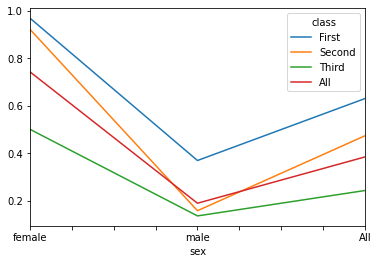

In [103]:
display(titanic.pivot_table('survived', index='sex', columns='class', margins=True))
titanic.pivot_table('survived', index='sex', columns='class', margins=True).plot()

In [101]:
age = pd.cut(titanic['age'], [0, 18, 80])
display(age.shape, age.head(), age.unique())
display(titanic.pivot_table('survived', index=['sex', age], columns='class'))

(891,)

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

[(18.0, 80.0], NaN, (0.0, 18.0]]
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [99]:
fare = pd.qcut(titanic['fare'], 2)
display(titanic.pivot_table('survived', ['sex', age], [fare, 'class']))

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

# Vectorized String Operation

# Working with time Series

In [108]:
from datetime import datetime
from dateutil import parser

In [110]:
print(datetime(year=2020, month=4, day=18))
print(parser.parse("1st April of 2020 at 4:00 AM"))

2020-04-18 00:00:00
2020-04-01 04:00:00


In [115]:
# But numpy might be faster
np_date = np.array('2020-04-18', dtype=np.datetime64)
print(np_date)

print(np_date + np.arange(15))

2020-04-18
['2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22'
 '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27'
 '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02']


In [119]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
print(dates)

print(pd.date_range('2015-07-03', '2015-07-10'))
print(pd.date_range('2015-07-03', periods=8))
print(pd.period_range('2015-07', periods=8, freq='M'))

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')
PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')


In [120]:
from pandas.tseries.offsets import BDay # business day

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## SAMPling in time series
resample() and asfreq()

# Eval and QUERY

In [123]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [124]:
pd.eval('df1 + df2 + df3 + df4')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.456085,2.240325,2.189299,2.796486,0.997756,1.857199,0.836188,1.993636,3.384643,1.851474,...,1.405156,1.972001,3.018147,2.220360,3.010689,1.747911,2.386533,1.733311,1.431434,1.987172
1,1.930732,1.325833,2.100320,1.031509,2.216550,2.322945,2.221711,2.551356,1.446013,1.150052,...,1.295991,1.298014,2.191522,1.514702,1.013891,2.682375,2.355956,1.905342,2.432560,1.438647
2,2.961585,1.241173,1.292687,1.559529,3.244460,1.727601,1.508593,2.373529,1.092988,1.932929,...,1.857067,2.436111,2.279347,2.240607,2.450652,1.527546,2.098585,1.540268,1.685716,1.544752
3,1.325278,2.311100,3.153195,2.428513,2.468706,2.168389,1.036675,2.543273,1.985104,1.664177,...,2.248197,2.597650,1.624677,1.896175,1.075806,2.305705,3.019780,1.157161,3.050878,2.029253
4,1.107165,1.998018,2.171741,3.011473,2.403474,1.785172,1.148053,0.842213,3.165272,1.333032,...,2.001123,2.899136,1.595563,2.134547,2.112748,2.100429,2.224902,0.643061,2.949058,3.143277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.948321,1.751224,2.276621,2.203974,2.752196,1.811677,1.544824,1.347874,2.406432,2.045719,...,2.156290,1.469662,1.239475,2.085855,1.546402,2.670792,0.801108,1.924963,1.309836,2.598576
99996,2.249443,2.248954,2.840738,2.278969,1.552147,1.613808,2.537029,2.572771,1.855158,1.570820,...,1.528213,1.484577,1.659783,1.798531,1.920396,3.043902,1.965024,1.725764,1.465961,1.805480
99997,1.942065,2.352778,1.104218,1.777017,2.159435,1.715014,2.424385,2.013074,1.637694,3.488990,...,2.159156,2.096489,1.486934,2.669343,2.069421,1.332025,2.191244,2.179376,1.816149,1.682464
99998,2.681177,0.958664,2.867072,1.127300,1.277971,1.268119,1.756763,2.250528,1.326825,2.479023,...,1.608354,2.040729,2.223907,3.272577,1.933145,2.578746,1.132848,1.919029,2.201389,1.950606


In [126]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
display(df.head())

result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

,A,B,C
0,0.099772,0.365763,0.422644
1,0.941930,0.160890,0.832411
2,0.692094,0.255150,0.668258
3,0.901389,0.718069,0.577554
4,0.944688,0.354645,0.494979


True

In [128]:
result2 = df.query('A < 0.5 and B < 0.5')
result2

,A,B,C
0,0.099772,0.365763,0.422644
5,0.372495,0.126174,0.624648
7,0.304463,0.087584,0.398856
24,0.409017,0.249659,0.913871
31,0.422093,0.147429,0.106137
...,...,...,...
985,0.490021,0.355504,0.502268
987,0.250296,0.391466,0.108348
990,0.364400,0.297859,0.461036
994,0.404296,0.314461,0.505974
